# Detection-Models Demo

The `detection-models` library aims to abstract out many of the lower-level operations of TensorFlow's Object Detection API and establishes simple, object-oriented APIs that allow users to interact with Object Detection models.

## Imports

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt

import detection_models
import detection_models.utils

## Environment Setup

This allows us to display images in the Jupyter notebook.

In [2]:
%matplotlib inline

## Loading the Model and Label Map

We'll start by loading a **frozen inference graph** pre-trained on the COCO dataset: `ssd_inception_v2_coco`. The model is stored as a `.pb` file, a format based on Protocol Buffers that is standard to all frozen TensorFlow models.

This SSD model is capable of detecting objects from the COCO dataset in images and providing bounding boxes with associated scores for each object detected. Each TensorFlow Object Detection API model is trained to detect a different set of classes/labels, and each uses class "ID" values for predictions rather than the class string itself. We therefore need a **label map** to map each of the IDs to a class string so that we know what we are detecting. Label maps are stored as `.pbtxt` files and must be consistent throughout both model training and model evaluation/deployment.

We've stored a sample model and label map in this repository for tests. These are provided as `pathlib.Path` objects to the `BBoxDetector` constructor. The `BBoxDetector` class loads the model and label map into memory.

In [3]:
sample_data_dir = Path.cwd() / "tests" / "test_data"

model_path = sample_data_dir / "inception_graph_boxes.pb"
label_map_path = sample_data_dir / "mscoco_label_map.pbtxt"

model = detection_models.BBoxDetector(
    model_path=model_path,
    label_map_path=label_map_path)

## Loading a Sample Image

Subclasses derived from `ObjectDetector` (including `BBoxDetector`) can perform inferences on images that are loaded as `numpy.ndarray` objects in the RGB colorspace. The Python Imaging Library (PIL) provides convenient methods for loading images from disk and converting to/from numpy arrays, and the OpenCV-Python library lets users directly load and work with images as numpy arrays (though in the BGR colorspace by default).

We'll load a sample image stored in this repository using a utility function and display it below.

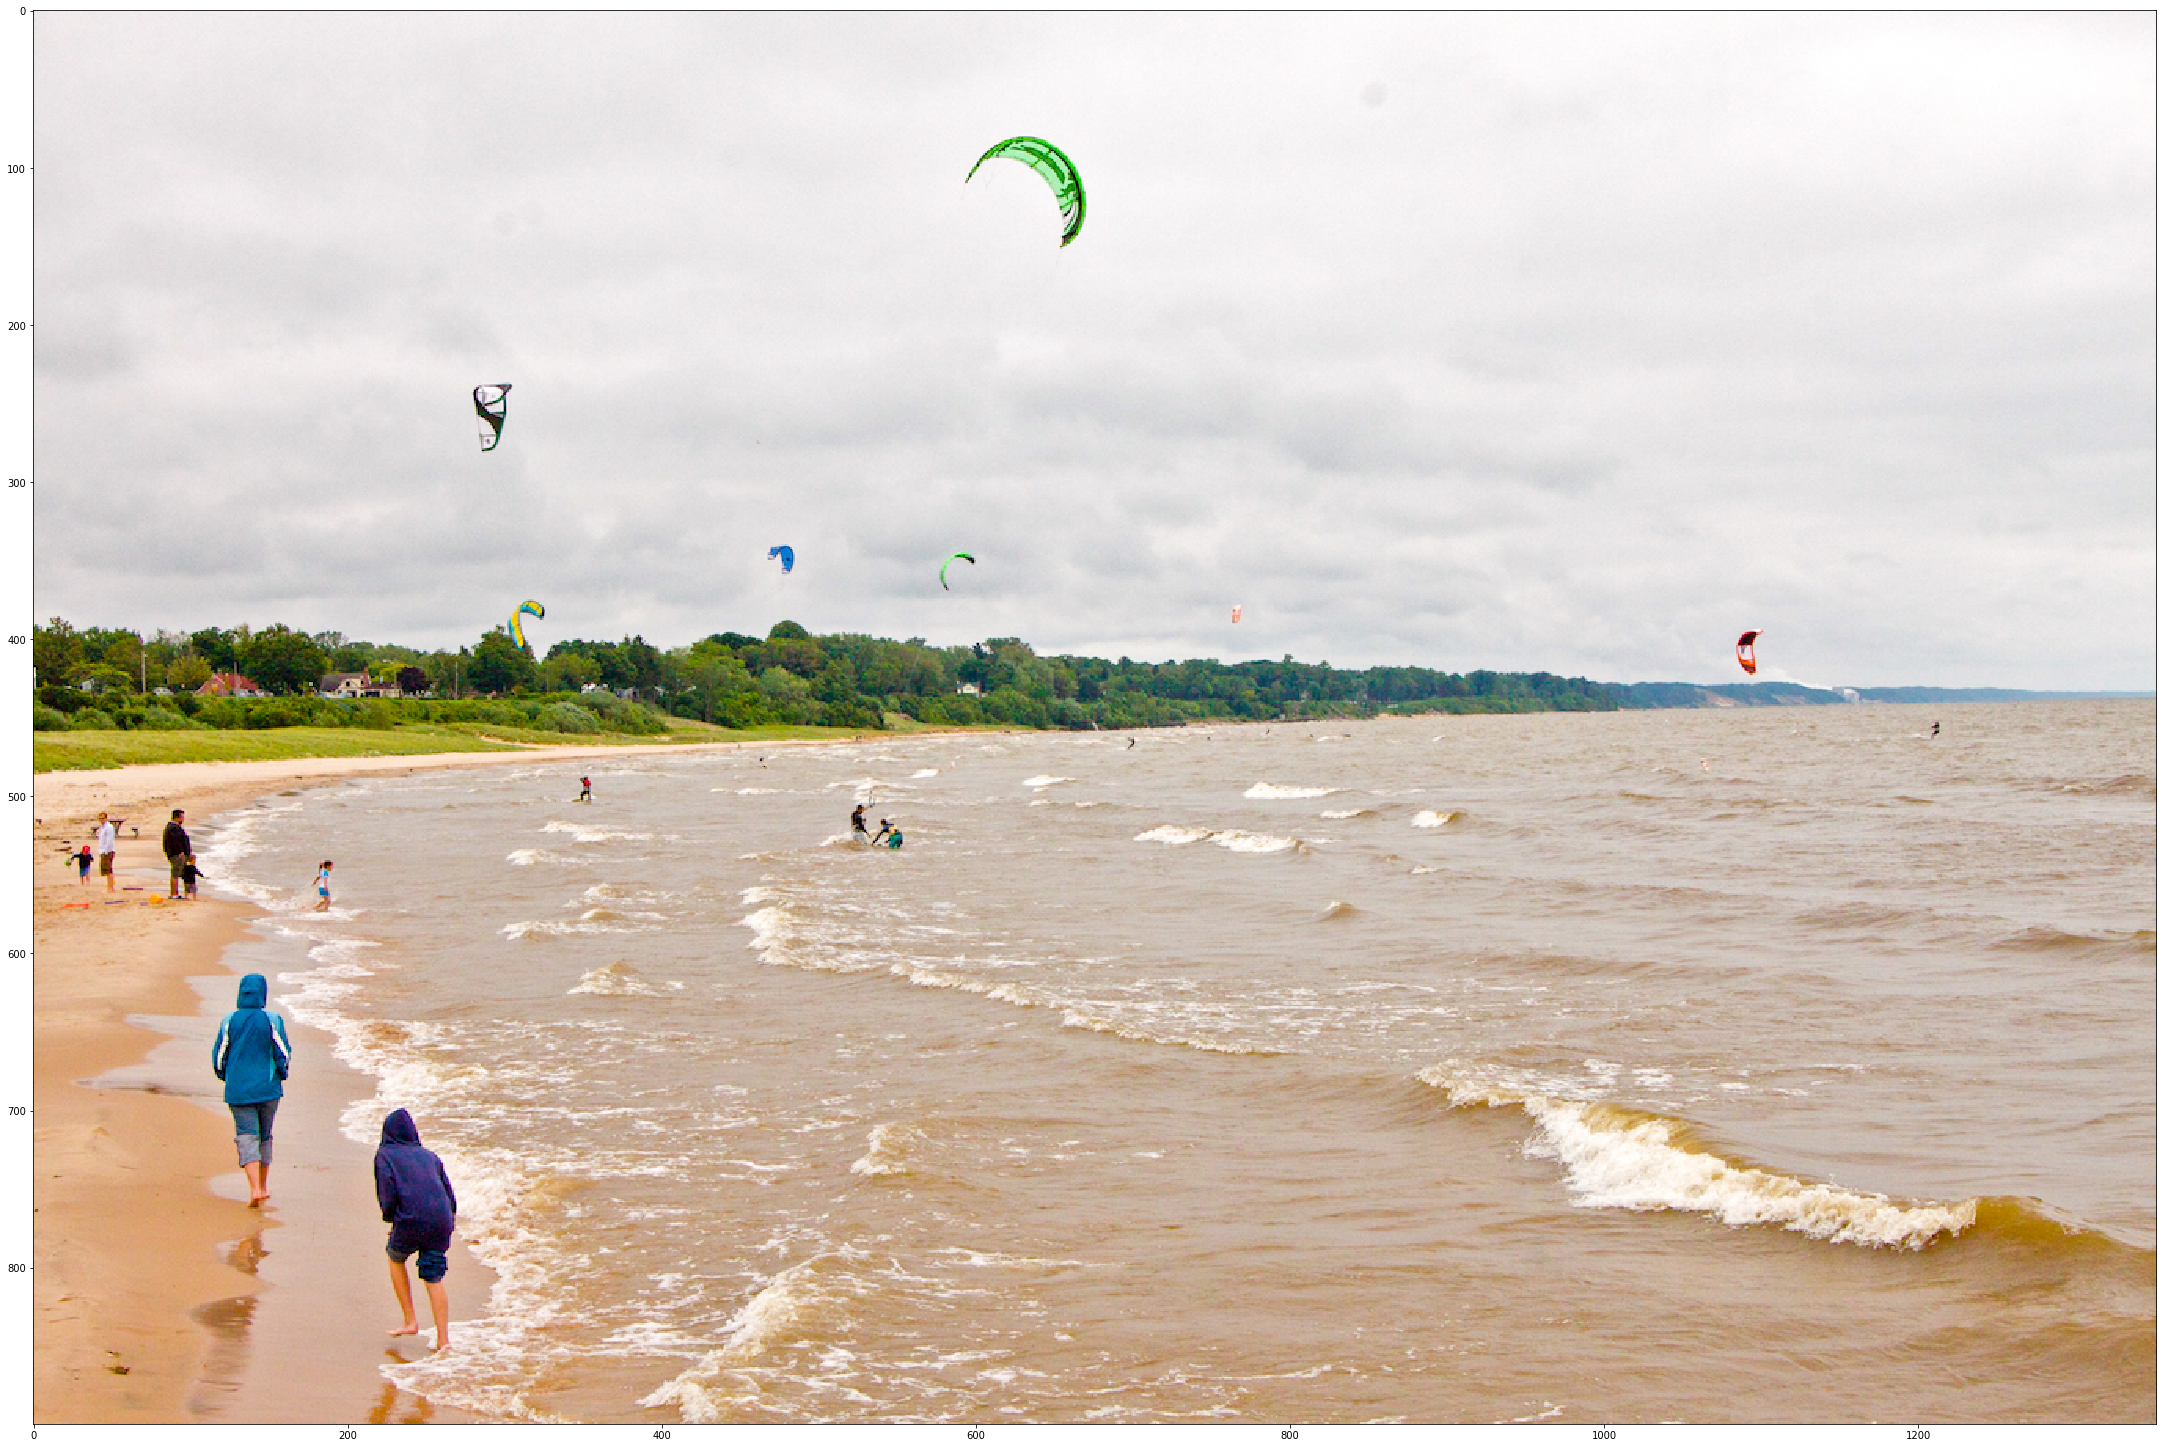

In [4]:
sample_image_path = sample_data_dir / "image.jpg"
image = detection_models.utils.load_image_as_array(sample_image_path)

# scale the figure up to make it clearer in this notebook
plt.figure(figsize=(40, 26))
plt.imshow(image)

## Performing Object Detection

Performing object detection is as simple as calling the `detect` method of an `ObjectDetector` object and supplying an input image.

In [5]:
detection_results = model.detect(image)

## Understanding the Results

The predictions made by a model's `detect` method are stored as a `detection_models.results.DetectionResults` object, a subclass of `collections.OrderedDict`.

The dictionary is keyed with the detected labels (from the label map) ordered in descending order of labels with the highest detection score (which we've termed "confidence"). The value at each key is a list of all of the instances of the detected label within the image. Each instance is stored as a `detection_models.results.DetectedBBox` object in this case (a subclass of the more general `DetectedObject`). Each `DetectedBBox` stores the label, detection score, and (normalized) bounding box dimensions for that instance.

We'll loop through each of the labels in the `DetectionResults` and also look over each of the `DetectedBBox` objects for each instance of each label:

In [6]:
for label, instances in detection_results.items():
    print("CATEGORY: " + label)
    for instance in instances:
        print("\t" + str(instance))

CATEGORY: person
	label: person | confidence: 0.9601 | ymin: 0.5653 | xmin: 0.3949 | ymax: 0.5923 | xmax: 0.4081
	label: person | confidence: 0.9334 | ymin: 0.5651 | xmin: 0.0592 | ymax: 0.6188 | xmax: 0.0781
	label: person | confidence: 0.7783 | ymin: 0.5731 | xmin: 0.0177 | ymax: 0.6282 | xmax: 0.0341
	label: person | confidence: 0.7697 | ymin: 0.4421 | xmin: 0.8043 | ymax: 0.4769 | xmax: 0.8278
	label: person | confidence: 0.6098 | ymin: 0.5415 | xmin: 0.2613 | ymax: 0.5602 | xmax: 0.2707
	label: person | confidence: 0.5730 | ymin: 0.7633 | xmin: 0.1579 | ymax: 0.9567 | xmax: 0.2035
CATEGORY: kite
	label: kite | confidence: 0.9470 | ymin: 0.0891 | xmin: 0.4397 | ymax: 0.1694 | xmax: 0.4957
	label: kite | confidence: 0.9046 | ymin: 0.3798 | xmin: 0.3519 | ymax: 0.4022 | xmax: 0.3646
	label: kite | confidence: 0.7761 | ymin: 0.3841 | xmin: 0.4287 | ymax: 0.4042 | xmax: 0.4473
	label: kite | confidence: 0.7467 | ymin: 0.2666 | xmin: 0.2073 | ymax: 0.3161 | xmax: 0.2272
	label: kite | c

We've stored the results as a custom `OrderedDict` object so that we can add visualization methods. While we've added functionality to filter out bounding boxes based upon their scores or to limit the number of overall boxes drawn on an image, we'll just use the basic overlay here.

The image with overlaid boxes and scores (either modified in-place or returned by the method) is still in numpy array format and can be saved or displayed to the screen at the user's discretion.

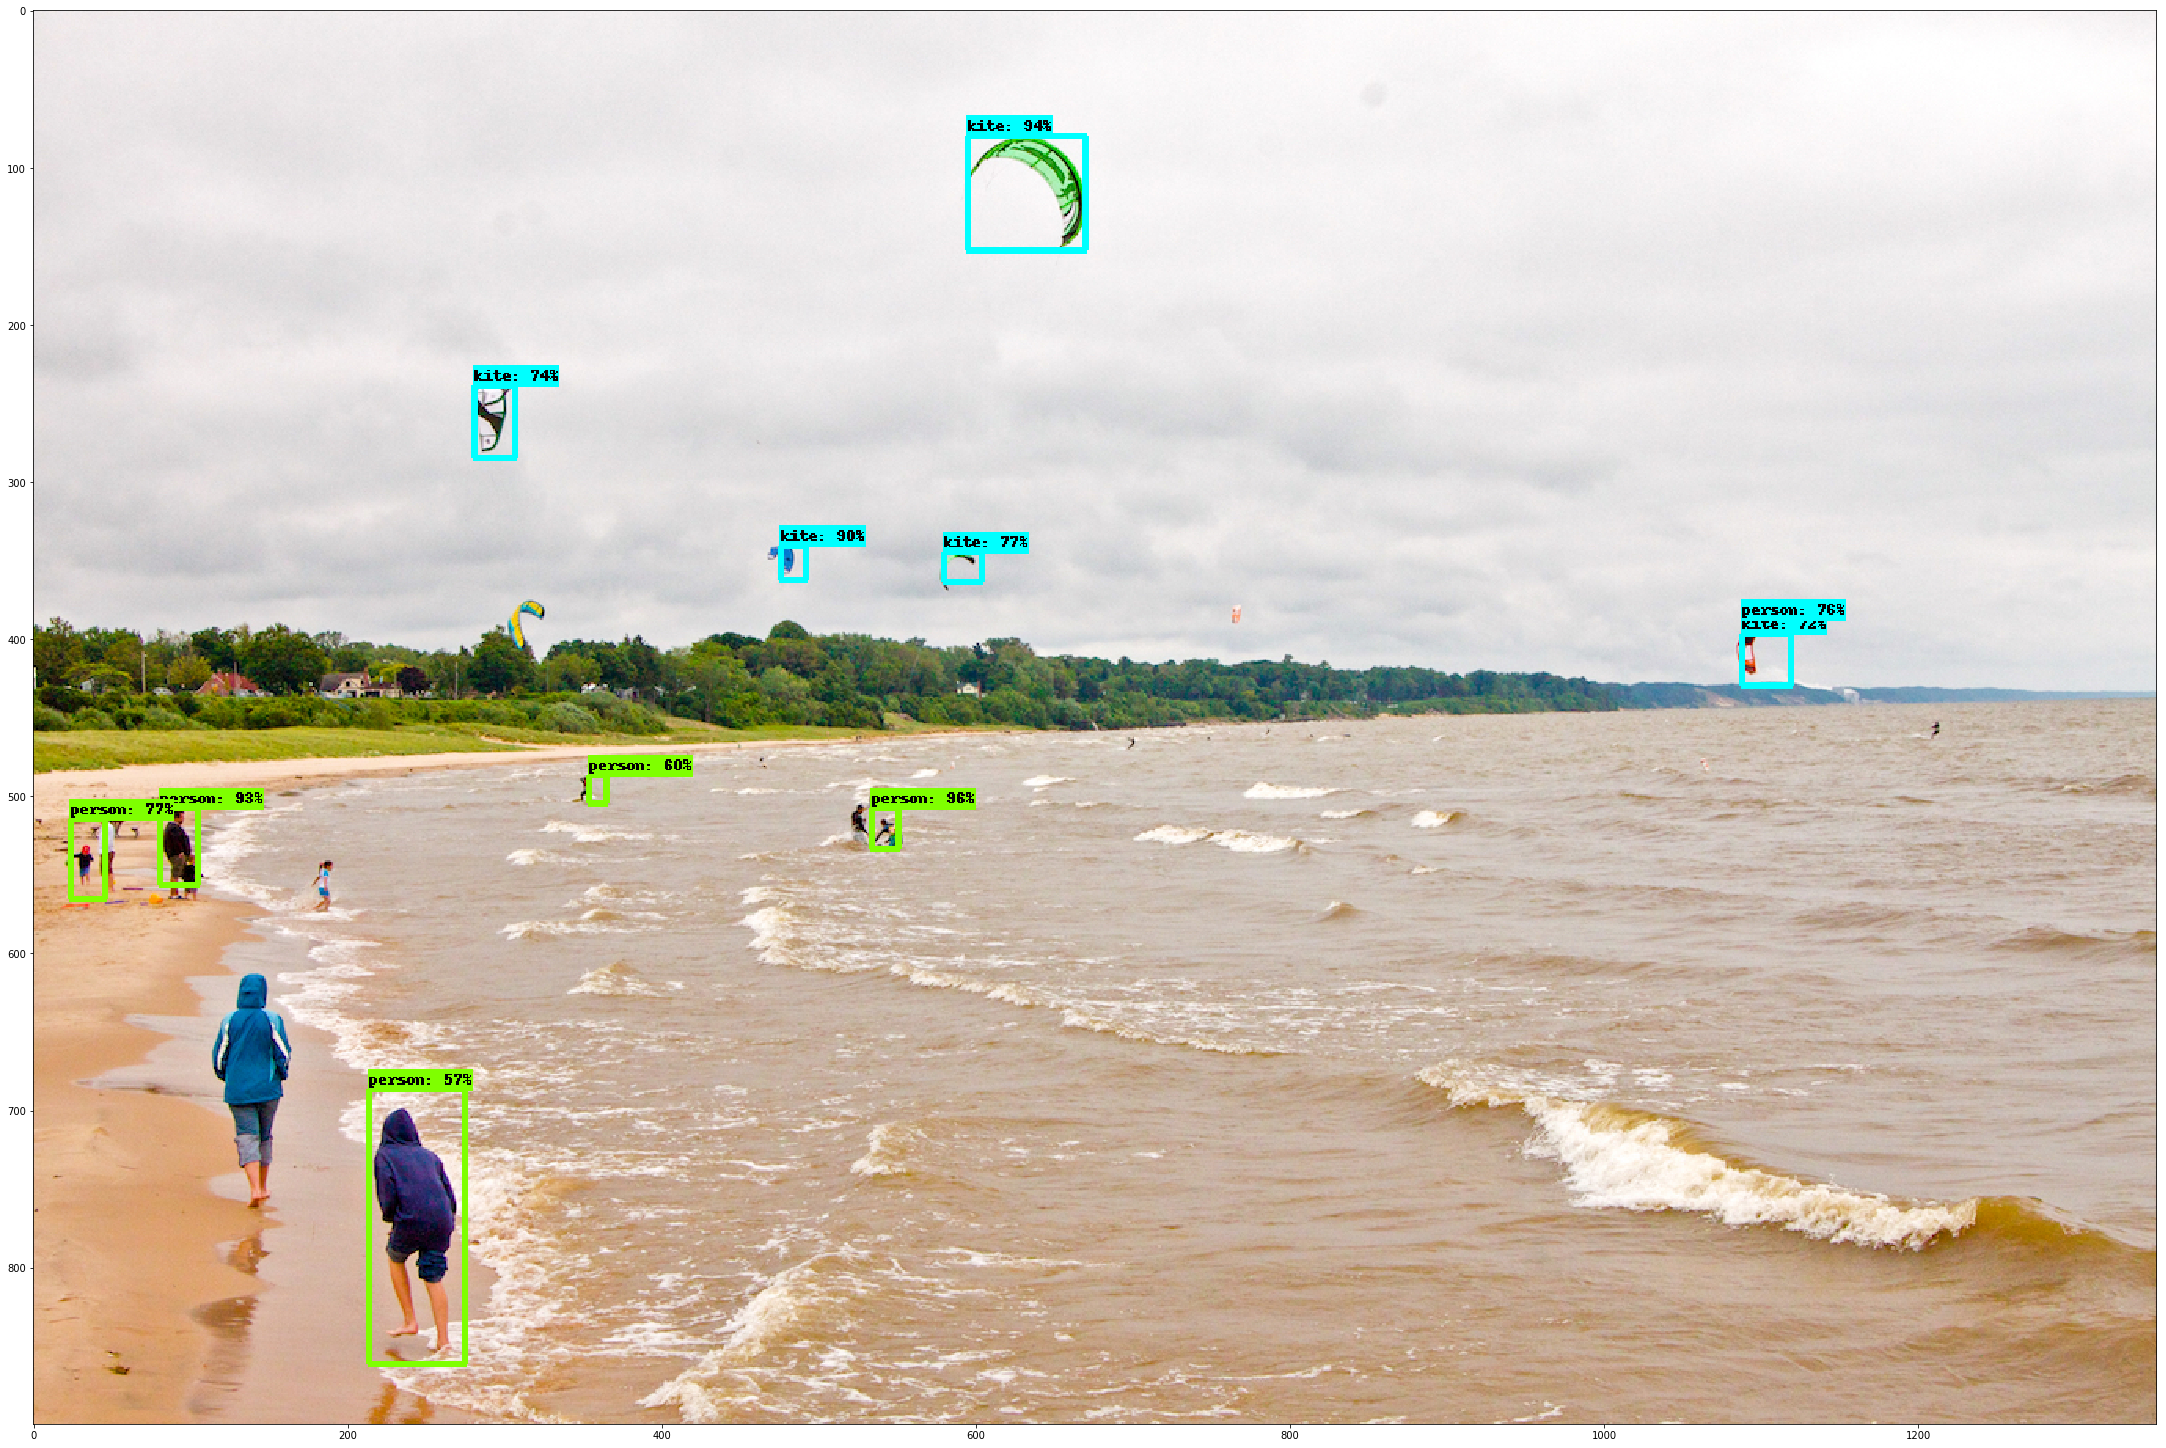

In [7]:
visualized_image = detection_results.overlay_all_on_image(image, inplace=False)

# scale the figure up to make it clearer in this notebook
plt.figure(figsize=(40, 26))
plt.imshow(visualized_image)